## How to Clone from AGOL to Portal

Procedure:

##### Clone individual feature services
1. Sign in AGOL (**Source)
2. Sign in Portal for ArcGIS (**Target)
3. Create helper functions
4. Extract only hosted feature services from the **source
5. Clone the feature services from source to **target
6. Check the feature services cloned in the **target

##### Clone Web Maps and Operations Dashboard and associated hosted feature services
##### Note that non-hosted feature services cannot be cloned.

Reference: https://developers.arcgis.com/python/guide/cloning-content/
https://support.esri.com/en/technical-article/000018924
https://developers.arcgis.com/python/guide/accessing-and-creating-content/
https://www.youtube.com/watch?v=8G0Nlfko8Ow
https://support.esri.com/en/technical-article/000022252

In [1]:
from pathlib import Path
import sys

from arcgis.gis import GIS, Item
from arcgis.env import active_gis
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

In [2]:
# 1. Sign in Source (AGOL)
# GIS("https://railway-sector.maps.arcgis.com", "matsuzakieijinscrex", "timberland12345", verity_cert=False)
source = GIS("https://railway-sector.maps.arcgis.com", "matsuzakieijinscrex", "timberland12345", verity_cert=False)

In [3]:
# Sign in Target (Portal)
target = GIS("https://mmspgc-gis.mmspgc.local/portal", "cauan_b82", "0206@khloe", verify_cert = False)

In [4]:
active_gis = source

In [5]:
def get_user_items(user, active_gis):
    user_inventory = {}
    user_items = active_gis.content.search(query=f"* AND owner:{user.username}", 
                                           max_items=500)
    for item in user_items:
        if item.type not in user_inventory:
            user_inventory[item.type] = [i 
                                         for i in user_items 
                                         if i.type == item.type]
    return user_inventory

In [6]:
def print_user_inventory(inventory):
    for itype, ilist in inventory.items():
        try:
            print(f"{itype}\n{'-'*50}")
            for i in ilist:
                print(f"{' ':3}{i.title:50}")
            print("\n")
        except Exception as e:
            print(f"\t\tOperation failed on: {i.title}")
            print(f"\t\tException: {sys.exc_info()[1]}")
            continue           

In [7]:
def get_fs_webmaps(fs, inv):
    fs_webmap_inventory = {}
    fs_inv = []
    try:
        for wm in inv['Web Map']:
            if fs.id in get_layer_item_ids(wm):
                if not wm in fs_inv:
                    fs_inv.append(wm)
        fs_webmap_inventory[fs.title] = fs_inv
        return fs_webmap_inventory
    except KeyError as ke:
        pass

In [8]:
def get_layer_item_ids(wm):
    wmo = WebMap(wm)
    wm_id_list = []
    for layer in wmo.layers:
        try:
            fsvc = FeatureLayerCollection(layer['url'][:-1], active_gis)
            if not fsvc.properties['serviceItemId'] in wm_id_list:
                wm_id_list.append(fsvc.properties['serviceItemId'])
        except Exception as e:
            pass
    return wm_id_list

In [9]:
def get_dash_wm(dash):
    return [active_gis.content.get(widget['itemId']) 
            for widget in dash.get_data()['widgets'] 
            if widget['type'] == "mapWidget"]

In [10]:
source_admin_inventory = get_user_items(source.users.me, source)

In [11]:
print_user_inventory(source_admin_inventory)

Service Definition
--------------------------------------------------
   TBM_Assembly_Progress                             
   SC_PotentialLandlocked_Polygon                    
   PierHead_Column_N2                                
   Status for Relocation_N2                          
   NCR_Railways                                      
   Parcellary_Structure_SC                           
   PotentialAccessSC                                 
   Structure_N2_NLO_LO                               
   Station_Box                                       
   Utility_Relocation_Dataset                        
   N2_Parcels_forPublic                              
   Parcellary_compiled_N2                            
   Viaduct_N2                                        
   N2N01_Landlocked                                  
   Labels                                            
   testPointUtil                                     
   AffectedAreasLandlockedSC                         
   Structure

   Test_Dataset_Clone_to_Portal                      
   00-Status of Land and Structure (MMSP)            
   Status of Land Acquisition (MMSP)  - Priority1    
   NSCR-Ex Project (GRM Website)                     
   Sample_DeleteLater                                
   Status of Land and Structure Acquisition (N2)-rev1
   Status of Tree Compensation_N2                    
   Status of Land and Structure Acquisition (N2)     
   TBM Assembly                                      
   GRM Portal                                        
   Status of Pre-Construction_N2                     
   SC_Landlocked_Dashboard                           
   Status of Tree Cutting and Conservation (N2)      
   Status of Relocation_ISF (N2) _rev2               
   Status of Land Acquisition (MMSP)                 
   Utility Relocation (N2)                           
   Status of Tree Inventoried (N2)                   


Web Experience
--------------------------------------------------
   Untitled ex

In [12]:
for item_type in list(source_admin_inventory.keys()):
    print(item_type)

Service Definition
Feature Service
Web Mapping Application
Dashboard
Web Experience
Web Map
Hub Site Application
Style
Code Attachment
Map Service
Image Service
CSV
Scene Service
Form
Desktop Style
Image
Replication Package
Microsoft Word
Web Scene
Shapefile
Tile Package
Hub Initiative


### Feature Services (Hosted)

Clone hosted feature services. Please note that non-hosted feature services (i.e., registered feature services) cannot be cloned.
###### If web maps or operations dashboard is cloned, skip this process

In [22]:
# Extract only hosted feature layer from Feature Service
hosted_fsvc = [fs 
               for fs in source_admin_inventory["Feature Service"]
               if 'Hosted Service' in fs.typeKeywords]
hosted_fsvc

[<Item title:"SES Validation Survey" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Station_N2SC" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Tree Cutting and Compensation Dataset" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"N2N01_Landlocked" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"N2_Parcels_forPublic" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Station_N2" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"MCRP Centerline Chainage" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"SC_Stations" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Status of LA_N2" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Structure_SC" type:Feature Layer Collection owner:matsuzakieijinscrex>, <Item title:"Parcellary_Structure_SC" type:Feature Layer Collection owner:matsuzakieijinscr

In [21]:
# Search by owner
#my_content = source.content.search(query="owner:" + "matsuzakieijinscrex",
#                                  item_type = "Feature Layer",
#                                  max_items=15)

In [23]:
# Extract Service Definition
hosted_fsvc_servdef = source.content.search(query="owner:" + "matsuzakieijinscrex", item_type="Service Definition")
hosted_fsvc_servdef

[<Item title:"AsBuilt_Compiled_N2_points" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Station_N2" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"MCRP_UtilityLines_Relocation" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Utility Relocation Arrow" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Dilapidation_Survey" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Station_N2SC" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"AsBuilt" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"TBM_Spot" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Utility_Relocation" type:Service Definition owner:matsuzakieijinscrex>, <Item title:"Pier_ID_N2" type:Service Definition owner:matsuzakieijinscrex>]

In [20]:
# Search by title
#hosted_fsvc = source.content.search(query="title:Parcellary_Structure_SC", item_type="Feature Service")
#hosted_fsvc

[<Item title:"Parcellary_Structure_SC" type:Feature Layer Collection owner:matsuzakieijinscrex>]

In [24]:
# Clone selected hosted feature layer from source to target
for hfs in hosted_fsvc:
    try:
        if hfs.ownerFolder:
            folder = next((f['title'] 
                          for f in source.users.me.folders 
                          if f['id'] == hfs.ownerFolder))
            if not folder in [fld['title']
                              for fld in target.users.me.folders]:
                target.content.create_folder(folder=folder)
            print(f"Cloning {hfs.title}...")
            clone_fs = target.content.clone_items([hfs], folder=folder)
            print(f"...completed")
        else:
            print(f"Cloning {hfs.title}...")
            cloned_fs = target.content.clone_items([hfs])
            if not cloned_fs:
                print(f"{hfs.title} not cloned")
            else:
                print(f"...completed")       
    except Exception as e:
        print(f"...Failed to Clone {hfs.title}...")
        print(f"\tException Type: {sys.exc_info()[0]}")
        print(f"\tException Value: {sys.exc_info()[1]}")
        print(f"\tException Traceback line: {sys.exc_info()[2].tb_lineno}")
        print(f"\tException Traceback instruction: {sys.exc_info()[2].tb_lasti}")
        continue

Cloning SES Validation Survey...
...Failed to Clone SES Validation Survey...
	Exception Type: <class 'Exception'>
	Exception Value: Invalid token.
Invalid token.
(Error Code: 498)
	Exception Traceback line: 12
	Exception Traceback instruction: 116
Cloning Station_N2SC...
...completed
Cloning Tree Cutting and Compensation Dataset...
...completed
Cloning N2N01_Landlocked...
...completed
Cloning N2_Parcels_forPublic...
...completed
Cloning Station_N2...
...Failed to Clone Station_N2...
	Exception Type: <class 'arcgis._impl.common._clone._ItemCreateException'>
	Exception Value: ('Failed to create Feature Service Station_N2: ERROR: Dataset not found.\n(Error Code: 500)', <Item title:"Station_N2" type:Feature Layer Collection owner:cauan_b82>)
	Exception Traceback line: 12
	Exception Traceback instruction: 116
Cloning MCRP Centerline Chainage...
...completed
Cloning SC_Stations...
...Failed to Clone SC_Stations...
	Exception Type: <class 'arcgis._impl.common._clone._ItemCreateException'>
	Ex

	Exception Traceback line: 12
	Exception Traceback instruction: 116
Cloning N2_Free_and_Clear...
...completed
Cloning PotentialAccessSC...
...Failed to Clone PotentialAccessSC...
	Exception Type: <class 'arcgis._impl.common._clone._ItemCreateException'>
	Exception Value: ("Failed to create Feature Service PotentialAccessSC: The submitted field 'Shape_Length' does not exist in the table 'db_jijtx.hsu_wx6nb.potentialaccesssc_potentialaccess'.\n(Error Code: 500)", <Item title:"PotentialAccessSC" type:Feature Layer Collection owner:cauan_b82>)
	Exception Traceback line: 12
	Exception Traceback instruction: 116
Cloning SC_Landlocked_WFL1...
...Failed to Clone SC_Landlocked_WFL1...
	Exception Type: <class 'arcgis._impl.common._clone._ItemCreateException'>
	Exception Value: ("Failed to create Feature Service SC_Landlocked_WFL1: The submitted field 'ORIG_FID' does not exist in the table 'db_jijtx.hsu_wx6nb.sc_landlocked_wfl__potentiallandlocked_polygon'.\n(Error Code: 500)", <Item title:"SC_La

In [ ]:
# Clone selected 'Service Definition' source to target
for hfs in hosted_fsvc_servdef:
    try:
        if hfs.ownerFolder:
            folder = next((f['title'] 
                          for f in source.users.me.folders 
                          if f['id'] == hfs.ownerFolder))
            if not folder in [fld['title']
                              for fld in target.users.me.folders]:
                target.content.create_folder(folder=folder)
            print(f"Cloning {hfs.title}...")
            clone_fs = target.content.clone_items([hfs], folder=folder)
            print(f"...completed")
        else:
            print(f"Cloning {hfs.title}...")
            cloned_fs = target.content.clone_items([hfs])
            if not cloned_fs:
                print(f"{hfs.title} not cloned")
            else:
                print(f"...completed")       
    except Exception as e:
        print(f"...Failed to Clone {hfs.title}...")
        print(f"\tException Type: {sys.exc_info()[0]}")
        print(f"\tException Value: {sys.exc_info()[1]}")
        print(f"\tException Traceback line: {sys.exc_info()[2].tb_lineno}")
        print(f"\tException Traceback instruction: {sys.exc_info()[2].tb_lasti}")
        continue

In [25]:
# Query the target to inspect the results of cloning the feature services
target_admin_inventory = get_user_items(target.users.me, target)

In [26]:
print_user_inventory(target_admin_inventory)

Map Service
--------------------------------------------------
   Utility_MIL1                                      
   TandangSora_CreekDiversion                        
   RailwayNetwork                                    
   SouthLine                                         
   TandangSoraCreek                                  
   Building_Structures                               
   gisdata_GISOWNER_Station_Name                     
   BuildingStructures                                
   ExistingUtilitiesLine                             
   Status of Tree Cutting Permits _TCP_              
   ExistingCreek                                     
   gisdata_GISOWNER_TandangSora_Creek                


Web Map
--------------------------------------------------
   South_Line                                        
   Test                                              
   Depot Structures                                  
   MMSP Alignment                                    
   Railway N

In [27]:
# Check feature services ID cloned between source and target
target_to_source = {}
for targ_fsvc_item in target_admin_inventory['Feature Service']:
    for keyword in targ_fsvc_item.typeKeywords:
        if 'source' in keyword:
            source_id = keyword.split('-')[1]
            try:
                flyr = source.content.get(source_id)
                target_to_source[targ_fsvc_item.title] = (keyword,
                                                          flyr.title,
                                                          flyr.id)
            except Exception as e:
                pass
for trg_item, src_item in target_to_source.items():
    print(f"Target Item: {trg_item:45}{src_item[0]}\n{' '*2}"
          f"Source Item: {src_item[1]:45}{src_item[2]}")
    print("\n")

Target Item: Parcellary_Structure_SC                      source-37485cc08f924ffb84a673469bdcf7a8
  Source Item: Parcellary_Structure_SC                      37485cc08f924ffb84a673469bdcf7a8


Target Item: Station_N2SC                                 source-31a5443827b5489aa45b01cf44474929
  Source Item: Station_N2SC                                 31a5443827b5489aa45b01cf44474929


Target Item: Tree Cutting and Compensation Dataset        source-96fbd3f01cf94f6f9c2b2c73a940d595
  Source Item: Tree Cutting and Compensation Dataset        96fbd3f01cf94f6f9c2b2c73a940d595


Target Item: N2_Parcels_forPublic                         source-3aeb3d980fdf4e32893ee97c4ebe45b2
  Source Item: N2_Parcels_forPublic                         3aeb3d980fdf4e32893ee97c4ebe45b2


Target Item: N2N01_Landlocked                             source-055e66e9d65442fb959aa08874200d5a
  Source Item: N2N01_Landlocked                             055e66e9d65442fb959aa08874200d5a


Target Item: TBM_Alignment         

In [28]:
# Examine the target feature services to see that we also created the folder structure
target_hosted_fsvc = [fs 
               for fs in target_admin_inventory["Feature Service"]
               if 'Hosted Service' in fs.typeKeywords]

In [29]:
target_hosted_fsvc

[<Item title:"ExistingUtilityPoint" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Parcellary_Structure_SC" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Station_N2SC" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Tree Cutting and Compensation Dataset" type:Feature Layer Collection owner:cauan_b82>, <Item title:"N2_Parcels_forPublic" type:Feature Layer Collection owner:cauan_b82>, <Item title:"N2N01_Landlocked" type:Feature Layer Collection owner:cauan_b82>, <Item title:"TBM_Alignment" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Structure_SC" type:Feature Layer Collection owner:cauan_b82>, <Item title:"MCRP Centerline Chainage" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Status of Structure (NLO/LO)_N2" type:Feature Layer Collection owner:cauan_b82>, <Item title:"SC RAP - SCM and Appraisal" type:Feature Layer Collection owner:cauan_b82>, <Item title:"Parcellary_Municipaly_and_Barangay_disso" type:Feature Laye

In [30]:
active_gis = target

In [99]:
print(f"{'Feature Layer':<33}{'Folder ID':<35}{'Folder Name':15}{'Item ID'}\n"
      f"{'-'*28:<30}{'-'*33:<35}{'-'*13:<15}{'-'*37}")
for hosted_fs in target_hosted_fsvc:
    try:
        fs_wm_maps = get_fs_webmaps(hosted_fs, target_admin_inventory)[hosted_fs.title]
    except TypeError as te:
        pass
        continue
    finally:
        if not hosted_fs.ownerFolder:
            print(f"{hosted_fs.title[:30]:33}{' ':35}{'Root Folder':15}{hosted_fs.id}")
            if fs_wm_maps:
                for wm in fs_wm_maps:
                    print(f"{' '*2}...consumed in {wm.title} web map")
            else:
                pass
        else:
            print(f"{hosted_fs.title[:30]:33}{hosted_fs.ownerFolder:35}"
                  f"""{next(f['title'] for f in target.users.me.folders 
                   if f['id'] == hosted_fs.ownerFolder):15}"""
                  f"{hosted_fs.id}")
            if fs_wm_maps:
                for wm in fs_wm_maps:
                    print(f"{' '*2}...consumed in {wm.title} web map")
            else:
                pass
        print("\n")

Feature Layer                    Folder ID                          Folder Name    Item ID
----------------------------  ---------------------------------  -------------  -------------------------------------
Find_Locations_in_Process        b72d1976bb6a49af95083a3c1d9c6a45   MMSP_duringC   c3df35e180dd4cb3a8883c992cd170e6


Tree Cutting and Compensation_   c9fedb0b17c946689bf13b78b103f12a   NSCR-Ex_preC   7402e136afb942bd8cb3540b3d11ea78
  ...consumed in Tree Cutting and Conservation web map
  ...consumed in Tree Compensation web map


Stations_and_Alignment                                              Root Folder    9d9645abbda248d095d89d7637446f52


Dilapidation_Survey              b72d1976bb6a49af95083a3c1d9c6a45   MMSP_duringC   4a1a7a7416f74cccaaab22a06b04e47d


OBS_Bridge                       b72d1976bb6a49af95083a3c1d9c6a45   MMSP_duringC   b716fbf174bf4519b92272e4ee6014a0


TBM_Spot                         b72d1976bb6a49af95083a3c1d9c6a45   MMSP_duringC   bf98937409884516b244

### Web Maps

Clone Web Maps and hosted feature services consumed in the web maps.
NOTE: non-hosted feature services (e.g., registered feature services) are not cloned but only reference.
      This means that you need to sign in the Portal for ArcGIS when web maps makes a reference to the
      the registered feature services.

In [31]:
# Look at the Web Maps in our source organization
for wm in source_admin_inventory['Web Map']:
    wm_obj = WebMap(wm)
    print(wm_obj.item.title)

SES Validation for Training Tool
00-Land and Structure (MMSP)
CPN01_landlocked
Test_Dataset_Clone_to_Portal
SC Contactless Attendance
SC_Landlocked_Street
Status of Tree Compensation_N2
Status of Land Acquisition (MMSP)-Priority1
TBM_Assembly
Utility Relocation (N2)
Pre-Construction Status (N2)
Survey123_BanlicTrial
Status of Land and Structure Acquisition (N2)
SC_Landlocked
Status for Relocation (ISF)_N2
Status of Land and Structure Acquisition (SC)
UAV Checklist
00-Pre-Construction Status (MMSP)
NSCR-Ex Stations
N2 Parcellary
SC RAP - SCM and Appraisal
SES Validation Survey Dispatcher Map
SES Validation Tool for NLO
Status of Tree Cutting and Conservation (N2)
Status of Relocation (ISF)_N2
Status of Land Acquisition (MMSP)
SES Validation Survey
N2_LA_basemap


In [32]:
# Inpsect what layers are in each Web Map

In [33]:
def is_hosted(item):
    return [keyword for keyword in item.typeKeywords if "Hosted" in keyword]

In [34]:
def print_webmap_inventory(wm):
    wm_obj = WebMap(wm)
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        try:
            if is_hosted(Item(active_gis, wm_layer['itemId'])):
                print(f"{' '*2}{wm_layer['title']:40}HOSTED{' ':5}"
                      f"{wm_layer['layerType']:20}{dict(wm_layer)['itemId']}")
            else:
                print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                      f"{wm_layer['layerType']:20}{wm_layer.id}") 
        except:
            print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                  f"{wm_layer['layerType']:20}{wm_layer.id}")
    print("\n")

In [35]:
# Remember to set the active_gis variable when using the helper functions
active_gis = source

In [36]:
# This helper function may also freeze.
for wm in source_admin_inventory['Web Map']:
    print_webmap_inventory(wm)

SES Validation for Training Tool
----------------------------------------------------------------------------------------------------
  SES Validation for Training Tool        HOSTED     ArcGISFeatureLayer  94af0fd8a8ff46b5bfb60b4924efd8f5


00-Land and Structure (MMSP)
----------------------------------------------------------------------------------------------------
  Station                                 HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Drainage                                HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  PO Section                              HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  EVS Drawings                            HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Construction Boundary                   HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Creek Diversion                         HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea25

  Trees (Cut/Earthballed)                 HOSTED     ArcGISFeatureLayer  515c18f3b5204f9b9d7d047e30a94b2f
  Trees (Paid)                            other      ArcGISFeatureLayer  Trees_N2_5476_7864
  Relocation (ISF) Relocated              other      ArcGISFeatureLayer  Status_for_Relocation_N2_4244_6253
  Relocation (ISF) Paid                   HOSTED     ArcGISFeatureLayer  414bf052e9344cd58125adbe10d2520d
  Structure (HandOver)                    other      ArcGISFeatureLayer  176549daf34-layer-2_8969
  Structure (Paid)                        HOSTED     ArcGISFeatureLayer  442de7a0e25d4eaa8b6b3fe2e3b68262
  LA (HandOver)                           other      ArcGISFeatureLayer  Parcellary_compiled_N2_6966_3238
  LA (Paid)                               HOSTED     ArcGISFeatureLayer  3e31d434ec9a4e7b978dec0d99059ee5
  Pier Head/Column                        HOSTED     ArcGISFeatureLayer  d6a26319b66141e5861d4662c009b961
  Station_Box                             HOSTED     ArcGISFeature

  Priority Lots                           other      ArcGISFeatureLayer  Parcellary_Structure_SC_2189_7069_3147
  Station SC                              HOSTED     ArcGISFeatureLayer  16ed67786ee846018169fa00da3bc586
  NSCR_Ex PROW                            HOSTED     ArcGISFeatureLayer  878c49e145b34f269947f8584cd3512c
  Status for Relocation                   HOSTED     ArcGISFeatureLayer  37485cc08f924ffb84a673469bdcf7a8
  Status of Structure                     HOSTED     ArcGISFeatureLayer  cc7d0ef7e1144144b71d06dbf2c1ae9b
  Status of Land Acquisition              HOSTED     ArcGISFeatureLayer  37485cc08f924ffb84a673469bdcf7a8
  Lot Boundary                            other      ArcGISFeatureLayer  Parcellary_Structure_SC_2189_7069
  Structure Boundary                      other      ArcGISFeatureLayer  Structure_SC_4197_7998
  Station Box                             HOSTED     ArcGISFeatureLayer  9c6026c7b748428796c35709ed4d560f


UAV Checklist
---------------------------------

  Station_Box                             HOSTED     ArcGISFeatureLayer  f9f53223e41e4006b76484c04a2b9916
  Municipality (one boundary)             HOSTED     ArcGISFeatureLayer  fcb7c73a624e40d9ac12cea319427ff8
  Barangay (one boundary)                 HOSTED     ArcGISFeatureLayer  fcb7c73a624e40d9ac12cea319427ff8


Status of Land Acquisition (MMSP)
----------------------------------------------------------------------------------------------------
  Station                                 HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Drainage                                HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  PO Section                              HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  EVS Drawings                            HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Construction Boundary                   HOSTED     ArcGISFeatureLayer  4f155bc22b4d461fa3c09ea256b1e3a4
  Creek Diversi

In [57]:
# Use helper functions to return a list of the unique itemId values consumed in each web map
for wm in source_admin_inventory['Web Map']:
    print(f"{wm.title}\n{'-'*80}")
    for item_id in get_layer_item_ids(wm):
        print(f"{' '*2}{item_id}")
    print("\n")

SES Validation for Training Tool
--------------------------------------------------------------------------------
  94af0fd8a8ff46b5bfb60b4924efd8f5


CPN01_landlocked
--------------------------------------------------------------------------------
  7e1812db542a4261b73787dfe5a5d438
  ca3df3508a2f4c89a79a158a8397ba9b
  055e66e9d65442fb959aa08874200d5a
  878c49e145b34f269947f8584cd3512c
  3aeb3d980fdf4e32893ee97c4ebe45b2


00-Land and Structure (MMSP)
--------------------------------------------------------------------------------
  4f155bc22b4d461fa3c09ea256b1e3a4


Status of Tree Compensation_N2
--------------------------------------------------------------------------------
  878c49e145b34f269947f8584cd3512c
  515c18f3b5204f9b9d7d047e30a94b2f
  16ed67786ee846018169fa00da3bc586


SC_Landlocked_Street
--------------------------------------------------------------------------------
  8b586731718d4415bfcc725e25644af9
  9fefc1af5d7a4c289734643b4cc00812
  581fbb2ee7b7438abbfbf6016316148c
 

In [84]:
# Use helper functions to return a list of the unique itemId values consumed in each web map
for wm in source_admin_inventory['Web Map']:
    wm_obj = WebMap(wm)
    if wm_obj.item.title == "TEST_clone_to_PORTAL":
        print(f"{wm.title}\n{'-'*80}")
        for item_id in get_layer_item_ids(wm):
            print(f"{' '*2}{item_id}")
        print("\n")
        print(wm_obj.item.ownerFolder)
    else:
        pass

TEST_clone_to_PORTAL
--------------------------------------------------------------------------------
  8bff96a629b14f3ca94060613262853c


None


In [104]:
# Choose a specific Web Map (not clone all the web maps)
# Make sure that all the feature layers are saved in a folder (I am not sure how feature layers saved in a root folder can?: 
# folder name is '')
wm_map = {}
for wm in source_admin_inventory['Web Map']:
    wm_obj = WebMap(wm)
    if wm_obj.item.title == "TEST_clone_to_PORTAL":
        print(f"{wm_obj.item.title}\n{'-'*50}")
        if wm_obj.item.ownerFolder:
            folder_name = [f['title'] for f in source.users.me.folders
                           if f['id'] == wm_obj.item.ownerFolder][0]
        try:
            print(f"...cloning {wm_obj.item.title}")
            cloned_wm = target.content.clone_items(items=[wm_obj.item], folder="MMSP_preC")
            wm_map[wm.id] = cloned_wm[0].id
            print(f"...completed")
            print(f"\n")
        except Exception as e:
            print(f"....failed to clone {wm_obj.item.title}")
            print(str(e))
            print(f"\n")
    else:
        pass

TEST_clone_to_PORTAL
--------------------------------------------------
...cloning TEST_clone_to_PORTAL
...completed




In [37]:
# Clone web maps
## If item ID exists in the web maps, it will use ones in target. If item ID does not exist, it will clone the item.
## For non-hosted items, it will recreate those items in the resulting web map.
wm_map = {}
for wm in source_admin_inventory['Web Map']:
    wm_obj = WebMap(wm)
    print(f"{wm_obj.item.title}\n{'-'*50}")
    if wm_obj.item.ownerFolder:
        folder_name = [f['title'] for f in source.users.me.folders 
                       if f['id'] == wm_obj.item.ownerFolder][0]
        try:
            print(f"...cloning {wm_obj.item.title}")
            cloned_wm = target.content.clone_items(items=[wm_obj.item], 
                                              folder=folder_name)          
            wm_map[wm.id] = cloned_wm[0].id
            print(f"...completed")
            print(f"\n")
        except Exception as e:
            print(f"....failed to clone {wm_obj.item.title}")
            print(str(e))
            print(f"\n")

SES Validation for Training Tool
--------------------------------------------------
...cloning SES Validation for Training Tool
....failed to clone SES Validation for Training Tool
('Failed to create Feature Service SES Validation for Training Tool: ERROR: Dataset not found.\n(Error Code: 500)', <Item title:"service_f937c26bf56b40e68589a630bd632c1a" type:Feature Layer Collection owner:cauan_b82>)


00-Land and Structure (MMSP)
--------------------------------------------------
...cloning 00-Land and Structure (MMSP)
....failed to clone 00-Land and Structure (MMSP)
("Failed to create Feature Service Status of Land Acquisition: The submitted field 'Target_Lot' does not exist in the table 'db_jijtx.hsu_wx6nb.status_of_land_acquisition_statusoflandacquisition0'.\n(Error Code: 500)", <Item title:"Status_of_Land_Acquisition" type:Feature Layer Collection owner:cauan_b82>)


CPN01_landlocked
--------------------------------------------------
...cloning CPN01_landlocked
...completed


Test_Dat

("Failed to create Feature Service Trees_N2: The submitted field 'Barangay' does not exist in the table 'db_jijtx.hsu_wx6nb.trees_n__trees_n22'.\n(Error Code: 500)", <Item title:"Trees_N2" type:Feature Layer Collection owner:cauan_b82>)


Status of Relocation (ISF)_N2
--------------------------------------------------
...cloning Status of Relocation (ISF)_N2
....failed to clone Status of Relocation (ISF)_N2
('Failed to create Feature Service Station_Box: ERROR: Dataset not found.\n(Error Code: 500)', <Item title:"Station_Box" type:Feature Layer Collection owner:cauan_b82>)


Status of Land Acquisition (MMSP)
--------------------------------------------------
...cloning Status of Land Acquisition (MMSP)
....failed to clone Status of Land Acquisition (MMSP)
("Failed to create Feature Service Status of Land Acquisition: The submitted field 'Target_Lot' does not exist in the table 'db_jijtx.hsu_wx6nb.status_of_land_acquisition_statusoflandacquisition4'.\n(Error Code: 500)", <Item title:"St

In [38]:
# Examine the resulting Web Map items in the target
target_admin_inventory = get_user_items(target.users.me, target)

In [39]:
active_gis = target

In [40]:
for wm in target_admin_inventory['Web Map']:
    print_webmap_inventory(wm)

South_Line
----------------------------------------------------------------------------------------------------
  SouthLine                               other      ArcGISMapServiceLayerSouthLine_4069


Test
----------------------------------------------------------------------------------------------------
  Status of Tree Cutting Permits _TCP_    other      ArcGISFeatureLayer  Status_of_Tree_Cutting_Permits__TCP__1781


Depot Structures
----------------------------------------------------------------------------------------------------
  Boundary                                other      ArcGISFeatureLayer  Boundary_2697
  BuildingStructures                      other      ArcGISFeatureLayer  BuildingStructures_4710
  OtB Preparation _ OtB Delivered         other      ArcGISFeatureLayer  OtB_Preparation___OtB_Delivered_8121
  AirPhotoPO12                            other      ArcGISMapServiceLayerAirPhotoPO12_1266


MMSP Alignment
-----------------------------------------------------

In [41]:
# Examine wm_map dictionary to see that we indeed have a dictionary mapping that has ids as
# both keys (source web map id) and values (target web map id).
wm_map

{'5d0001bad4b94126a7e7c0ae5e553989': 'c5a13cb1ea47419ea016fc87add96bba', '0f7bd8438a2a47eab49908d28f316b84': 'ce08ce5b80724590b79cbb453e11aafa', '8b62bcdcfe8c474c9ba7d32693b6a469': '83e9ba55f5334912970c2fa1c19bbfe3', '92e7c6ddd0e64a82bae6ea3a8c9a6579': '191994a7c2a74a55a5c19ff45f67f0c8', '2b0d810c264c4c92852c2d14a3e18caa': 'dda5872ebcaa4c74a202c5cffe7df9ba'}

In [42]:
# Visually compare our web maps

In [43]:
# Source web map
source_webmap = WebMap(source.content.get(list(wm_map.keys())[0]))
source_webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [112]:
# Target web map
target_webmap = WebMap(target.content.get(list(wm_map.values())[0]))
target_webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### ArcGIS Dashboards

Clone Operations Dashboard and associated hosted and other feature services

<Item title:"1-Properties for Land Acquisition (NVS)_Compiled" type:Dashboard owner:matsuzakieiji>
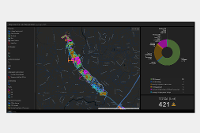

In [156]:
ops_dash = source_admin_inventory['Dashboard'][15]
ops_dash

<Item title:"TEST_clone_to_PORTAL" type:Dashboard owner:matsuzakieijinscrex>
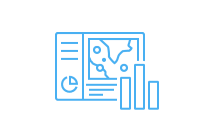

In [117]:
ops_dash = source_admin_inventory['Dashboard'][6]
ops_dash

In [116]:
for dashn in ops_dash:
    print(dashn.title)

Status of Relocation_ISF (N2) _rev1
Status of Land Acquisition (MMSP) - compiled
00-Pre-Construction Status (N2)
Pre-Construction Status (MMSP)
00-Status of Land and Structure (MMSP) 
Status of Land Acquisition (MMSP)  - Priority1
TEST_clone_to_PORTAL
NSCR-Ex Project (GRM Website)
Sample_DeleteLater
Status of Land and Structure Acquisition (N2)-rev1
Status of Tree Compensation_N2 
Status of Land and Structure Acquisition (N2)
TBM Assembly
SC_Landlocked_Dashboard
GRM Portal
Status of Pre-Construction_N2
Status of Tree Cutting and Conservation (N2)
Status of Relocation_ISF (N2) _rev2
Status of Land Acquisition (MMSP)
Utility Relocation (N2)
Status of Tree Inventoried (N2)


In [118]:
active_gis = source

<Item title:"TEST_clone_to_PORTAL" type:Web Map owner:matsuzakieijinscrex>
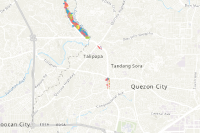

In [119]:
# Get Web Map used in the Operations Dashboard
dash_wm = get_dash_wm(ops_dash)[0]
dash_wm

In [120]:
WebMap(dash_wm)

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [126]:
dash_wm.id

'0c140f5c9e7548a38e5edd2c04876fe9'

In [127]:
print_webmap_inventory(dash_wm)

TEST_clone_to_PORTAL
----------------------------------------------------------------------------------------------------
  TEST_clone_to_PORTAL                    HOSTED     ArcGISFeatureLayer  8bff96a629b14f3ca94060613262853c




In [128]:
# Query the web map object we created to see if this web map id was cloned.
wm_item_mapping = {src_wm:trg_wm for src_wm,trg_wm in wm_map.items()
                   if dash_wm.id == src_wm}
wm_item_mapping

{'0c140f5c9e7548a38e5edd2c04876fe9': '5b99829c31ba4d8d87cc0ae5b3d637ef'}

In [129]:
# Clone Operations Dashboard
target.content.clone_items(items=[ops_dash],
                           folder="MMSP_preC",
                           item_mapping=wm_item_mapping)

[<Item title:"TEST_clone_to_PORTAL" type:Dashboard owner:matsuzakieiji>]